Кто не любит [гномиков](https://habr.com/ru/post/190242/)? Все любят гномиков!

А сегодня поговорим про генерацию [правильных скобочных последовательностей](https://neerc.ifmo.ru/wiki/index.php?title=Правильные_скобочные_последовательности) - одного из дефолтных "гномиков", которых задают на алгоритмы. Но будем отвечать не так, как от нас этого ждут!

Стандартно алгоритм работает через подсчёт открывающих и закрывающих скобок. Если мы достигли длины искомой строки, значит мы получили ответ. Если недостаёт открывающих скобок - допишем открывающую. Если открывающих скобок больше, чем закрывающих - допишем закрывающую. Лексикографический порядок соблюдён - ведь мы ставили открывающие скобки раньше, чем закрывающие, пока это возможно по счётчикам.

In [51]:
def gen(n: int, counter_open: int, counter_close: int, ans: str):
    """
    Если есть возможность поставить открывающую скобку, то мы ставим её. 
    Аналогично после этого если есть возможность поставить закрывающую скобку, 
    то после этого мы ставим и её.
    Таким образом строки будут выведены в лексографическом порядке, 
    так как сначала мы мы пытаемся поставить открывающую скобку. 
    При этом мы перебираем все возможные варианты последующих скобок 
    для каждого возможного префикса 𝚊𝚗𝚜, 
    а следовательно в результате получаем все возможножные 
    правильные скобочные последовательности
    """
    res = []
    if counter_open + counter_close == 2 * n:
        res.append(ans)
    if counter_open < n:
        res.extend(gen(n, counter_open + 1, counter_close, ans + '('))
    if counter_open > counter_close:
        res.extend(gen(n, counter_open, counter_close + 1, ans + ')'))
    return res

In [56]:
print('\n'.join(gen(3, 0, 0, '')))

((()))
(()())
(())()
()(())
()()()


А порядок в скобках это уже намёк! Запомним это и внимательнее присмотримся к шагу от `n` к `n+1`. 

In [83]:
def red(s: str):
    r_start = "\x1b[31m"
    r_finish = "\x1b[0m"
    return r_start+str(s)+r_finish

def gen_step(n):
    #if n<:
    #    raise Exception()
    res = []
    gen_n = set(gen(n, 0, 0, ''))
    for i in gen(n+1, 0, 0, ''):
        if i[1:-1] in gen_n:
            res.append(i[0]+red(i[1:-1])+i[-1])
        elif i[:-2] in gen_n:
            res.append(red(i[:-2])+i[-2:])
        elif i[2:] in gen_n:
            res.append(i[:2]+red(i[2:]))
        else:
            res.append(i)
    return res

In [84]:
print('\n'.join(gen_step(2)))

((()))
(()())
(())()
()(())
()()()


In [86]:
print('\n'.join(gen_step(3)))

(((())))
((()()))
((())())
((()))()
(()(()))
(()()())
(()())()
(())(())
(())()()
()((()))
()(()())
()(())()
()()(())
()()()()


Интуитивно понятно, что более длинные последовательноти можно получить из коротких просто обернув их в скобки. Ещё мы можем дописывать `()` слева и справа. Теперь мы не просто генерим скобки, а начинаем действовать на них операциями. Как сложение и умножение, только над скобками. А давайте перевернём эту фразу, заменив сложение на эти странные сдвиги и оборачивания, а скобки заменим на числа.

Скобок у нас всего две - `(` и `)`, и первое что приходит на ум - кодировать наборы как двоичные числа. Если что-то получится, не за горами любой скобочный алфавит (четверичный, восьмеричный etc.)

In [94]:
def encode(brackets):
    # just for demo purposes, your code may vary
    return int(''.join(brackets).replace('(','0').replace(')', '1'),2)

На примере $n=2$:

In [110]:
gen_2 = gen(2,0,0,'')
print(', '.join(gen_2))
print(', '.join([i.replace('(','0').replace(')', '1') for i in gen_2]))
print(', '.join([str(encode(i)) for i in gen_2]))

(()), ()()
0011, 0101
3, 5


Теперь наши скобки оживают как последовательности чисел! Соседние элементы различаются на 8, потом на 4, потом на 2...

In [116]:
gen_4_enc = [encode(i) for i in gen(4,0,0,'')]
gen_4_enc

[15, 23, 27, 29, 39, 43, 45, 51, 53, 71, 75, 77, 83, 85]

Но вместо ожидаемой красоты мы видим странное. Последовательность то хорошо себя ведёт, то ломается. $8,4,2,10$!

In [117]:
[gen_4_enc[i] - gen_4_enc[i-1] for i in range(1,len(gen_4_enc))]

[8, 4, 2, 10, 4, 2, 6, 2, 18, 4, 2, 6, 2]

Посмотрим, что творится при других $n$.

In [ ]:
import seaborn as sns

In [259]:
def gen_up_to(n):
    """
    generates the coded brackets table
    """
    table = []
    last = [encode(j) for j in gen(n,0,0,'')]
    last_len = len(last)
    for i in range(2,n):
        row = [encode(j) for j in gen(i,0,0,'')]
        row.extend([0]*(last_len-len(row)))
        table.append(row)
    table.append(last)
    return table

def gen_up_to(n):
    """
    computes the difference
    """
    table = []
    last_len = None
    for i in range(n,1,-1):
        prev = None
        row = []
        for j in gen(i,0,0,''):
            if prev is None:
                prev = encode(j)
            else:
                # just computing deltas
                cur = encode(j)
                row.append(cur-prev)
                prev = cur
        if last_len is None:
            last_len = len(row) # will fire once when i=n (max length)
        row.extend([0]*(last_len-len(row))) # padding with zeros
        table.append(row)
    return list(reversed(table))

<AxesSubplot:>

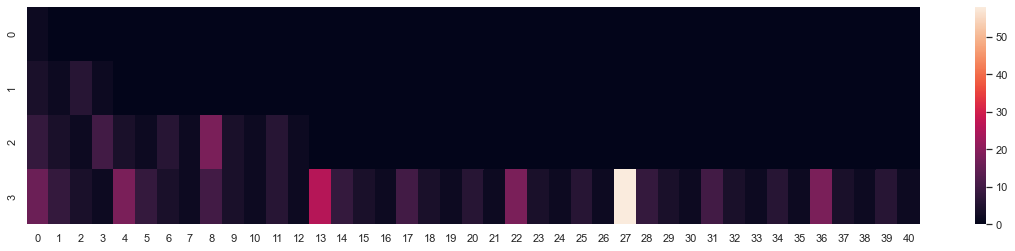

In [258]:
table_5 = gen_up_to(5)
sns.heatmap(table_5)

Разгадаем этот рисунок.

In [270]:
print('\n'.join(
    [
        ', '.join([str(j) for j in list(filter(lambda x: x>0, i))])
        for i in table_5]
))

2
4, 2, 6, 2
8, 4, 2, 10, 4, 2, 6, 2, 18, 4, 2, 6, 2
16, 8, 4, 2, 18, 8, 4, 2, 10, 4, 2, 6, 2, 26, 8, 4, 2, 10, 4, 2, 6, 2, 18, 4, 2, 6, 2, 58, 8, 4, 2, 10, 4, 2, 6, 2, 18, 4, 2, 6, 2


In [271]:
print('\n'.join(
    [
        ', '.join([str(j) for j in list(filter(lambda x: x>0, i))])
        for i in table_6]
))

2
4, 2, 6, 2
8, 4, 2, 10, 4, 2, 6, 2, 18, 4, 2, 6, 2
16, 8, 4, 2, 18, 8, 4, 2, 10, 4, 2, 6, 2, 26, 8, 4, 2, 10, 4, 2, 6, 2, 18, 4, 2, 6, 2, 58, 8, 4, 2, 10, 4, 2, 6, 2, 18, 4, 2, 6, 2
32, 16, 8, 4, 2, 34, 16, 8, 4, 2, 18, 8, 4, 2, 10, 4, 2, 6, 2, 42, 16, 8, 4, 2, 18, 8, 4, 2, 10, 4, 2, 6, 2, 26, 8, 4, 2, 10, 4, 2, 6, 2, 18, 4, 2, 6, 2, 74, 16, 8, 4, 2, 18, 8, 4, 2, 10, 4, 2, 6, 2, 26, 8, 4, 2, 10, 4, 2, 6, 2, 18, 4, 2, 6, 2, 58, 8, 4, 2, 10, 4, 2, 6, 2, 18, 4, 2, 6, 2, 202, 16, 8, 4, 2, 18, 8, 4, 2, 10, 4, 2, 6, 2, 26, 8, 4, 2, 10, 4, 2, 6, 2, 18, 4, 2, 6, 2, 58, 8, 4, 2, 10, 4, 2, 6, 2, 18, 4, 2, 6, 2


In [302]:
def is_binary(x):
    if x==0:
        return False
    while x//2>1:
        if x%2==1:
            return False
        x = x//2
    return x%2==0

In [310]:
for i in table_6:
    f = []
    for j in range(len(i)):
        if i[j]>0 and not is_binary(i[j]):
            f.append(str(j)+':'+str(i[j]))
    print(',  '.join(f))


2:6
3:10,  6:6,  8:18,  11:6
4:18,  8:10,  11:6,  13:26,  17:10,  20:6,  22:18,  25:6,  27:58,  31:10,  34:6,  36:18,  39:6
5:34,  10:18,  14:10,  17:6,  19:42,  24:18,  28:10,  31:6,  33:26,  37:10,  40:6,  42:18,  45:6,  47:74,  52:18,  56:10,  59:6,  61:26,  65:10,  68:6,  70:18,  73:6,  75:58,  79:10,  82:6,  84:18,  87:6,  89:202,  94:18,  98:10,  101:6,  103:26,  107:10,  110:6,  112:18,  115:6,  117:58,  121:10,  124:6,  126:18,  129:6


In [300]:
print('\n'.join(
    [
        ', '.join([str(j) for j in list(filter(lambda x: x>0 and (not is_binary(x)), i))])
        for i in table_6]
))


6
10, 6, 18, 6
18, 10, 6, 26, 10, 6, 18, 6, 58, 10, 6, 18, 6
34, 18, 10, 6, 42, 18, 10, 6, 26, 10, 6, 18, 6, 74, 18, 10, 6, 26, 10, 6, 18, 6, 58, 10, 6, 18, 6, 202, 18, 10, 6, 26, 10, 6, 18, 6, 58, 10, 6, 18, 6


In [178]:
test1 = [len(gen(i,0,0,"")) for i in range(1,12)]
test2 = [encode(gen(i,0,0,"")[-1]) - encode(gen(i,0,0,"")[0]) for i in range(1,12)]
test3 = [int('01'*i,2) for i in range(1,12)]
test4 = [test1[i]-2**i for i in range(len(test1))]